In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
import statsmodels

In [3]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'])

In [4]:
prop_16 = pd.read_csv('properties_2016.csv')

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [6]:
train_df = train_df1.copy()

In [27]:
train_df.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


아래의 자료는 컬럼별 자료형을 나타낸 데이터 프레임입니다.

In [13]:
train_dtype = train_df.dtypes.reset_index()
train_dtype.columns=['Count','Dtype']
train_dtype.tail()

,Count,Dtype
55,landtaxvaluedollarcnt,float64
56,taxamount,float64
57,taxdelinquencyflag,object
58,taxdelinquencyyear,float64
59,censustractandblock,float64


아래의 자료는 각 자료형에 해당하는 컬럼의 수를 나타내는 데이터 프레임입니다.

In [49]:
train_dtype.groupby('Dtype').agg('count').reset_index()

,Dtype,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


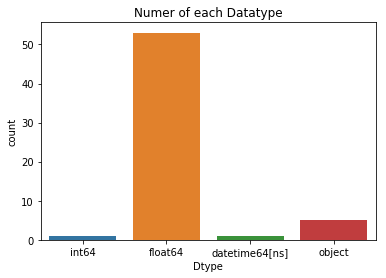

In [50]:
sns.countplot(train_dtype.Dtype)
plt.title('Numer of each Datatype')
plt.show()

In [35]:
train_missing = train_df.isnull().sum().reset_index()
train_missing.columns=['Columns','missing_count']
train_missing.sort_values(by='missing_count',inplace=True)
train_missing['missing_ratio'] = round((train_missing.missing_count / len(train_df)),4)
train_missing.reset_index(drop=True,inplace=True)
train_missing.tail()

,Columns,missing_count,missing_ratio
55,yardbuildingsqft26,90180,0.9989
56,storytypeid,90232,0.9995
57,basementsqft,90232,0.9995
58,finishedsquarefeet13,90242,0.9996
59,buildingclasstypeid,90259,0.9998


지금부터 numerical data(dtype='float64') 에 대해서 상관계수 overview를 진행할 것인데, 이에 앞서서 missing_value 에 대해서 data cleaning을 진행하도록 하겠습니다. 

In [ ]:
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']


In [77]:
train_float = [col for col in train_df.columns if train_df[col].dtype == 'float64'].pop(0)#delete logerror
len(train_float)

52

In [83]:
float_col = []
correl = []
for col in train_float:
    float_col.append(col)
    correl.append((np.corrcoef(train_df[col] , train_df.logerror)[0,1]))

/home/hskimim/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/hskimim/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [104]:
correl_df = pd.DataFrame(columns=['col','correl'])
correl_df.col = float_col
correl_df.correl = correl
correl_df.sort_values(by='correl').tail()

,col,correl
47,assessmentyear,NaN
48,landtaxvaluedollarcnt,NaN
49,taxamount,NaN
50,taxdelinquencyyear,NaN
51,censustractandblock,NaN


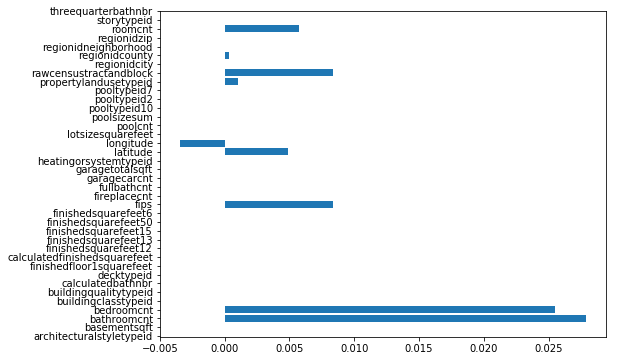

In [105]:
plt.figure(figsize=(8,6))
plt.barh(float_col,correl)
plt.show()